In [48]:
from graph_tool.all import *
import graph_tool as gt

import networkx as nx
import preprocessing as prep
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

from collections import Counter
from bb_binary import load_frame_container, Repository
from pandas import Series, DataFrame
%matplotlib inline

In [10]:
file_name = "1day20150822_0.95conf_160dist_3ilen.graphml"

In [34]:
G = graph_tool.load_graph(file_name)

In [35]:
def getfilteredGraph(G,t):
    
    # filter edges with threshold t
    ep = G.new_edge_property('bool')
    w = G.edge_properties.weight.a
    th = t

    for e, edge in enumerate(G.edges()):
        if (w[e] > th):
            ep[edge]=True
        else:
            ep[edge]=False
    
    G.set_edge_filter(ep)
    G.purge_edges()
    
    # filter nodes with degree 0
    vp = G.new_vertex_property('bool')
    deg = G.degree_property_map(deg='total').a

    for v, vertex in enumerate(G.vertices()):
        if (deg[v] > 0):
            vp[vertex]=True
        else:
            vp[vertex]=False
            
    G.set_vertex_filter(vp)
    G.purge_vertices()
    
    return G

In [36]:
list_states = []
for i in list(range(20)):
    G = getfilteredGraph(G.copy(),i)
    state = gt.inference.minimize_blockmodel_dl(G, deg_corr=False)
    list_states.append(state)

In [37]:
len(list_states)

20

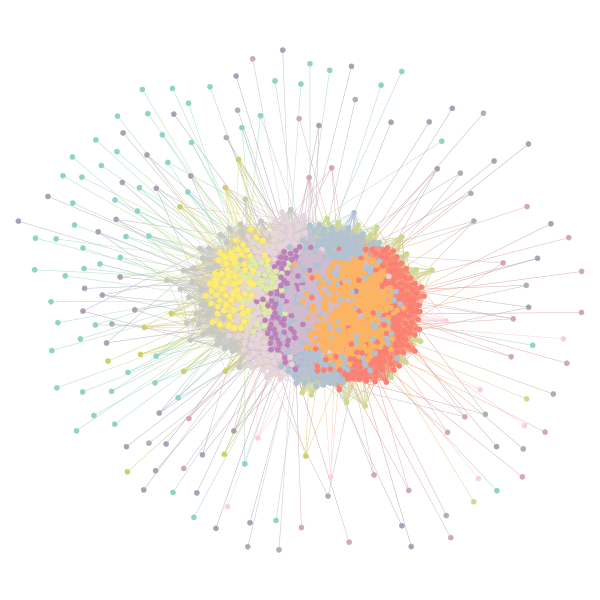

CPU times: user 18.8 s, sys: 52 ms, total: 18.8 s
Wall time: 12.6 s


<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe1e7c24f98, at 0x7fe1c37f0198>

In [59]:
%time list_states[3].draw()

# Number of Communities

In [47]:
ncommunities = []
for e,l in enumerate(list_states):
    b = l.get_blocks()
    l = len(Counter(b))
    ncommunities.append(l)
    print("{} Number of communities: {}".format(e, l))

0 Number of communities: 43
1 Number of communities: 25
2 Number of communities: 19
3 Number of communities: 16
4 Number of communities: 9
5 Number of communities: 7
6 Number of communities: 9
7 Number of communities: 7
8 Number of communities: 5
9 Number of communities: 4
10 Number of communities: 3
11 Number of communities: 1
12 Number of communities: 3
13 Number of communities: 1
14 Number of communities: 1
15 Number of communities: 1
16 Number of communities: 1
17 Number of communities: 1
18 Number of communities: 1
19 Number of communities: 1


In [52]:
s = Series(ncommunities)

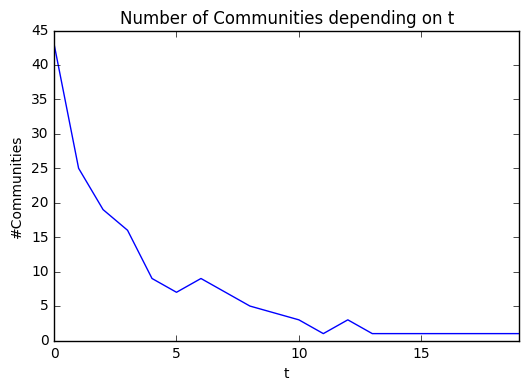

In [57]:
fig, ax = plt.subplots()
s.plot(ax=ax)
ax.set_title("Number of Communities depending on t")
ax.set_xlabel("t")
ax.set_ylabel("#Communities")

# Size of Communities (pro t)

In [134]:
data = []

for i in list_states:
    b = i.get_blocks()
    df = DataFrame(Series(Counter(b)))
    df['p'] = df[0]/df[0].sum()
    data.append(list(df.p))

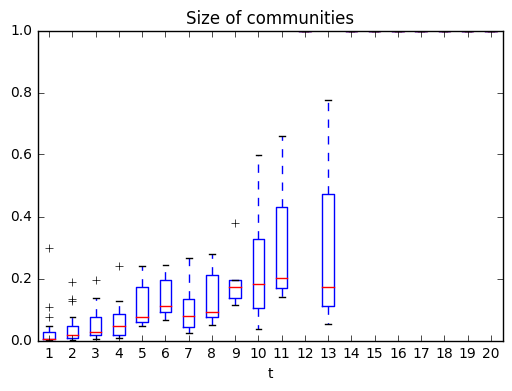

In [143]:
plt.figure()
plt.boxplot(data)
plt.title('Size of communities')
plt.xlabel('t')
plt.show()